# ANALISANDO O CANCELAMENTO DE PLANOS POR ASSINATURA DE UMA EMPRESA DE TELECOMUNICAÇÕES COM O AUXÍLIO DE ALGORITMOS DE MACHINE LEARNING

**POR LUCAS FONSECA MÜLLER**

### 1. INTRODUÇÃO 

O presente trabalho é um estudo de caso que visa analisar o churn (nível de evasão) dos clientes de uma empresa do setor de telecomunicações, buscando traçar um algoritmo que preveja os rompimentos de assinaturas dos planos, assim como detecte as variáveis envolvidas, para que a organização possa elaborar uma estratégia de retenção para esse grupo, e assim ampliar seus lucros, uma vez que o custo de aquisição de cliente é bem maior de que o de sua manutenção.

Sendo assim, este estudo de caso visa:

1. Detectar os atributos que possuem mais relação com o rompimento dos planos por assinatura;
2. Definir o algoritmo de machine learning que obtém a maior precisão na previsão dos churns. 

#### 1.1. Dicionário de variáveis:

* **State**: Estado de residência do cliente nos EUA;
* **Account length**: Número de meses que o cliente está fidelizado à companhia;
* **Area code**: Código de área
* **International plan**: Tem plano internacional?
* **Voice mail plan**: Possui plano com correio de voz? 
* **Number vmail messages**: Quantidade de correios de voz;
* **Total day minutes**: Total de minutos durante o dia;
* **Total day calls**: Total de chamadas durante o dia;
* **Total day charge**: Cobrança total durante o dia;
* **Total eve minutes**: Total de minutos ao início da noite;
* **Total eve calls**: Total de ligações ao início da noite;
* **Total eve charge**: Cobrança total ao início da noite;
* **Total night minutes**: Total de minutos à noite;
* **Total night calls**: Total de ligações à noite;
* **Total night charge**: Cobrança total à noite;
* **Total intl minutes**: Total de minutos internacionais;
* **Total intl calls**: Total de ligações internacionais;
* **Total intl charge**: Cobrança total internacional;
* **Customer service calls**: Quantidade de solicitações de suporte ao cliente;
* **Churn**: Cliente cancelou a assinatura do plano?

### 2. SUMARIZAÇÃO E PREPARAÇÃO DO DATASET 

#### 2.1. Imports

In [1]:
# Importando bibliotecas

# Análise de dados e data Wrangling
import numpy as np
import pandas as pd
import random as rnd

# DataViz
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

# Algoritmos de Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

#### 2.2. Coleta de dados e separação dos conjuntos de treino e teste

In [2]:
# Carregamento da base de dados
df = pd.read_csv('https://raw.githubusercontent.com/lucas-sls/Telecom_Churn/main/DATA/churns.csv')

# Definição dos conjuntos de treino e teste
df_treino = df.sample(frac=0.8 , random_state=200)
df_teste = df.drop(df_treino.index)

print(df.shape)
print(df_treino.shape)
print(df_teste.shape)

(3333, 20)
(2666, 20)
(667, 20)


#### 2.3. Descrevendo o dataset

##### Prévia dos dados

In [3]:
df_treino.head() # 5 primeiras linhas do dataset

# Sem variaveis alfa-numéricas para posterior tratamento!

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
960,NV,180,510,No,No,0,139.0,96,23.63,224.9,64,19.12,170.8,118,7.69,15.7,5,4.24,2,False
1937,OK,177,408,No,No,0,175.4,99,29.82,155.3,83,13.20,179.4,86,8.07,11.5,3,3.11,1,False
228,MI,86,415,No,Yes,28,221.6,74,37.67,288.4,100,24.51,240.3,105,10.81,9.0,2,2.43,1,False
2032,NJ,88,510,No,No,0,144.3,116,24.53,156.4,74,13.29,214.7,90,9.66,7.8,10,2.11,3,False
2391,KS,84,415,No,No,0,225.9,86,38.40,275.6,105,23.43,201.4,108,9.06,14.3,3,3.86,3,True


##### a) Quais variáveis estão disponíveis no conjunto de dados?

In [4]:
print(df_treino.columns.values)
print(len(df_treino.columns.values)) # existem 20 variáveis!


['State' 'Account length' 'Area code' 'International plan'
 'Voice mail plan' 'Number vmail messages' 'Total day minutes'
 'Total day calls' 'Total day charge' 'Total eve minutes'
 'Total eve calls' 'Total eve charge' 'Total night minutes'
 'Total night calls' 'Total night charge' 'Total intl minutes'
 'Total intl calls' 'Total intl charge' 'Customer service calls' 'Churn']
20


##### b) Quais são os tipos das variáveis?

In [5]:
df_treino.info() 
print('--' * 40)
df_teste.info()

# 3 categóricas (object)
# a variável-alvo ('Churn') é booleana
# 16 variáveis numéricas (8 inteiras e 8 floats)
# sem variáveis do tipo misto (alfanumérica)

# Sem valores vazios e ausentes ou em branco para o conjunto de treino e teste!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 960 to 1446
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null 

In [6]:
df_treino.duplicated().any() # Sem registros duplicados!

False

##### c) O que podemos perceber inicialmente a respeito das variáveis numéricas e categóricas do conjunto de treino?

In [7]:
df_treino.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,101.154539,437.427982,7.806827,179.945199,100.644786,30.591204,201.225169,99.874719,17.104385,201.608852,100.248312,9.072498,10.254764,4.531883,2.769287,1.571643
std,39.789636,42.442070,13.577317,54.362238,20.201486,9.241575,50.762638,20.039531,4.314817,50.677921,19.619759,2.280545,2.778632,2.513438,0.750231,1.325011
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,415.000000,0.000000,144.025000,88.000000,24.485000,167.100000,87.000000,14.200000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,180.000000,101.000000,30.600000,202.400000,100.000000,17.200000,202.350000,100.000000,9.105000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.900000,114.000000,36.870000,236.000000,114.000000,20.060000,236.600000,114.000000,10.650000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Diante da estatística descritiva de nossas variáveis numéricas, podemos extrair algumas conclusões:

* Cerca de metade dos clientes estão fidelizados a pelo menos 8 anos e 5 meses, sendo que a média geral está praticamente semelhante, o que sugere uma distribuição normal dos registros relacionados a esse atributo;

* Embora o código de área esteja como uma variável numérica, seria interessante, mais adiante, analisá-lo do ponto de vista categórico, uma vez que cada código representa uma determinada região geográfica dos EUA e pode ser analisada comparando com as variáveis numéricas deste conjunto de treino;

* Quanto à quantidade de mensagens por correio de voz, temos uma média de 7,8 mensagens por cliente. No entanto, metade deles não utiliza tal serviço, sugerindo assim que essas mensagens são utilizadas somente por uma determinada parcela de nosso portfólio, onde podemos inferir uma distribuição assimétrica;

* Analisando as variáveis de minutos gastos, quantidade de ligações e valor gasto (durante o dia, início da noite e noite) percebemos que todas elas possuem uma distribuição gaussiana, onde a média está muito próxima a mediana dos dados coletados; 

* Em relação aos minutos falados, notamos que os clientes ficam, em média, cerca de 12% a menos no telefone durante o dia, em comparação ao período noturno, apesar da média da quantidade de ligações seja próxima de 100 para os três turnos; 

* Embora tenhamos uma quantidade média de ligações semelhante nos três períodos do dia, assim como temos uma diminuição de 12% na quantidade de ligações de dia (em comparação ao início da noite e à noite), o custo médio atrelado a esse turno é cerca de 76% maior do que o custo médio por cliente das ligações realizadas no início da noite, e até 233% maior do que o custo médio noturno!;

* Quanto aos minutos destinados à ligações internacionais, obtemos uma média de 10,25 minutos por cliente, sendo que cerca de 3 a cada 4 pessoas realizam até 6 ligações, em média, para o exterior (onde encontramos extremos de 0 até 20 ligações); 

* Embora encontremos clientes com custo total de ligações internacionais que ultrapassam a marca dos 5 dólares, a média geral fica nos 2,76 dólares, sendo que o custo médio por ligação internacional é de 0,27 centavos de dólares a cada minuto utilizado;

* Em relação à procura por suporte ao cliente, cerca de 3 a cada 4 pessoas realizaram até 2 ligações à operadora, sendo que houveram extremos de zero solicitações até nove.

In [8]:
df_treino.describe(include=['O'])

,State,International plan,Voice mail plan
count,2666,2666,2666
unique,51,2,2
top,WV,No,No
freq,83,2396,1958


Já para as variáveis categóricas, podemos concluir inicialmente que:

* O estado americano da Virgínia Ocidental (WV) é o que contém mais clientes dentro do portfólio da empresa, preenchendo cerca de 3,1% do total. O portfólio contém clientes dos 51 estados americanos;

* Cerca de 1, a cada 10 clientes, possuem o plano que abrange ligações para o exterior;

* Aproximadamente 1 a cada 4 clientes possuem o plano que inclui as mensagens de voz.

* A nossa variável *target* é o *churn* do cliente, que não está contido nessa tabela por ser uma variável booleana representada por 0 (Cliente fidelizado) e 1 (Cliente evadido). 

#### 2.4. Suposições baseadas na análise dos dados

Chegando até esse ponto do trabalho, pudemos fazer algumas suposições quanto às ações a serem feitas para a otimização do nosso conjunto de dados. No entanto, antes de transformarmos essa suposições em ações proporiamente ditas, vamos validar cada tópico levantado. 

* **Correlações:** Vamos verificar o nível de correlação das nossas variáveis numéricas e categóricas com a nossa variável-alvo (*churn*);

* **Preenchimentos:** Não é necessário o preenchimento de nenhum campo, uma vez que, conforme verificamos, não há campos vazios em nosso conjunto de dados. Isso permite um cálculo preciso da correlação entre as variáveis preditoras com a nossa *target*. ;

* **Correções:** Vamos categorizar a variável '*area code*', além de apagar as variáveis relacionadas ao custo e tempo das ligações de todos os turnos, para criarmos variáveis novas de custo/tempo. O mesmo faremos com as variáveis de quantidade de solicitações e tempo de fidelidade, que dará lugar a uma única variável que me dirá quantos meses, em média, o cliente demora para solicitar auxílio;

* **Criações:** Conforme dito anteriormente, vamos criar variáveis novas de custo/tempo. Vamos testar também a criação de uma variável que relacionará a quantidade de solicitações de suporte por tempo de fidelidade;

* **Classificações:** Com base nas variáveis categóricas, podemos levantar mais algumas questõesb que podem ser analisadas em etapas posteriores do trabalho, como:

    **a)** *Qual estado americano que possui a maior probabilidade de churns?* 

    **b)** *Qual código de área (região do estado) em que houveram mais evasões de clientes?* 

    **c)** *Quem assina o plano de ligações internacionais tem mais chances de cancelar sua assinatura em relação aos que não assinam?*

    **d)** *Quem assina o plano de mensagens de voz tem mais chances de cancelar sua assinatura em relação aos que não aderem a esse serviço?*

### 3. ANÁLISE EXPLORATÓRIA

Com o objetivo de buscar respostas a algumas de nossas questões listadas acima, vamos analisar as nossas variáveis fazendo o cruzamento de informações entre as mesmas. 

In [9]:
df_treino[['State','Churn']].groupby(['State'], as_index=False).mean().sort_values(by='Churn', ascending=False).head()
 # questão[A] = Califórnia e Miami são os estados com maior probabilidade de Churn (cerca de 26,66%);

,State,Churn
4,CA,0.266667
22,MI,0.266667
31,NJ,0.263158
43,TX,0.261538
20,MD,0.241379


In [10]:
df_treino['Area code'] = df_treino['Area code'].astype(object)
df_treino[['Area code','Churn']].groupby(['Area code'],
                                                  as_index=False).mean().sort_values(by='Churn', ascending=False)

# Questão [B]:
# A probabilidade mais alta de churn por código de área (aprox. 15,5%) foi encontrada na região com o código de área 408;
# Todos os 3 códigos de área são do estado da Califórnia;
# 0 Código 408 pega a maior parte do condado de Santa Clara and o norte do condado de Santa Cruz; 
# Também inclui  as cidades de Gilroy, Morgan Hill, Saratoga, Los Gatos, Monte Sereno, Milpitas, Sunnyvale e  Santa Clara;
# Outras cidades: Cupertino, Campbell, e San Jose (região 408 fica ao sul da Baía de São Francisco);
# Os 3 códigos do dataset pertencem a uma região às margens da Baía de São Francisco, também conhecida como Vale do Silício.

,Area code,Churn
0,408,0.154799
2,510,0.146233
1,415,0.142964


In [11]:
df_treino[['International plan','Churn']].groupby(['International plan'],
                                                  as_index=False).mean().sort_values(by='Churn', ascending=False)
# Questão [C] = Sim. Quem tem plano internacional possui uma probabilidade de 42,2% de tornar-se Churn.
# Os que não utilizam o plano de ligações para o exterior possuem uma chance de apenas 11,56% de evadirem.

,International plan,Churn
1,Yes,0.422222
0,No,0.115609


In [12]:
df_treino[['Voice mail plan','Churn']].groupby(['Voice mail plan'],
                                                  as_index=False).mean().sort_values(by='Churn', ascending=False)
# Questão [D] = Não. clientes com planos que incluem mensagens de voz possuem cerca de 8,7% de churn.
# Em contrapartida, aqueles clientes que não possuem o plano, possuem 16,8% de churn (quase o dobro!).

,Voice mail plan,Churn
0,No,0.168029
1,Yes,0.087571


Agora vamos continuar nossa análise, só que com o auxílio visual dos nossos gráficos.

#### 3.1. Correlacionando as variáveis numéricas

<AxesSubplot:xlabel='Churn', ylabel='Customer service calls'>

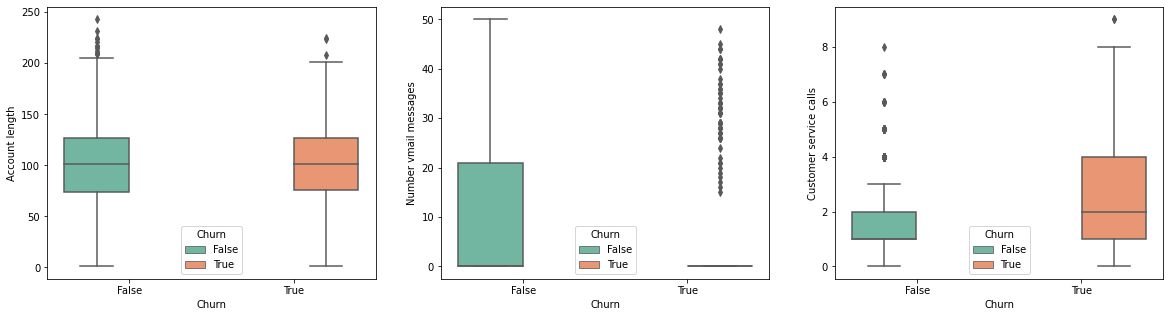

In [13]:
fig, axarr = plt.subplots(1, 3, figsize=(20, 5))
palette = 'Set2'
sns.boxplot(y='Account length',x = 'Churn', hue = 'Churn',data = df_treino, ax=axarr[0], palette=palette)
sns.boxplot(y='Number vmail messages',x = 'Churn', hue = 'Churn',data = df_treino , ax=axarr[1], palette=palette)
sns.boxplot(y='Customer service calls',x = 'Churn', hue = 'Churn',data = df_treino, ax=axarr[2], palette=palette)

* Conforme podemos observar (confirmando nossas observações iniciais feitas com o auxílio do método *describe*), a decisão pela evasão não contém muita influência do tempo de fidelidade, uma vez que ambos possuem uma média próxima aos 100 meses.

* Já no segundo boxplot, percebemos que grande parte dos churns não utilizava o serviço de mensagens de voz, uma vez que esse serviço está concentrado nos clientes ativos (seria interessante apostar nesse serviço para a elaboração de uma estratégia visando a retenção e prospecção dos nossos *customers*). 

* No terceiro boxplot, podemos notar que os clientes que optaram por desativar sua assinatura são aqueles que mais solicitaram suporte. Um investimento no controle de qualidade dos serviços prestados, capacitação da equipe de suporte, assim como a adoção dessa métrica como um indicador-chave para a organização, são ações que tendem a surtar efeitos positivos para a mesma.  

<AxesSubplot:xlabel='Churn', ylabel='Total night minutes'>

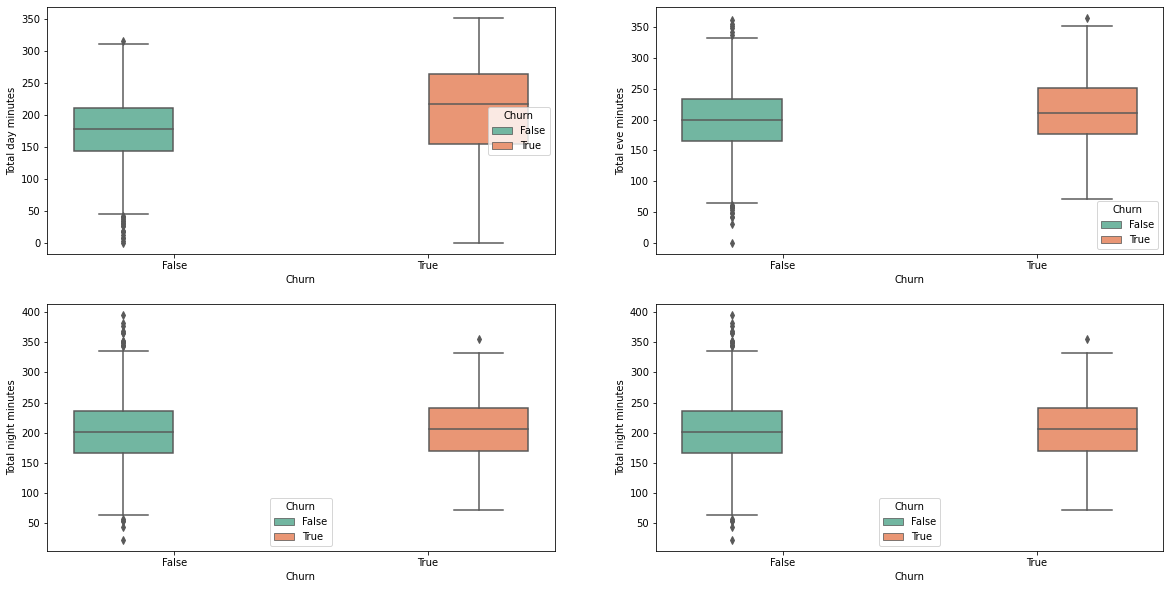

In [14]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 10))
palette = 'Set2'
sns.boxplot(y='Total day minutes',x = 'Churn', hue = 'Churn',data = df_treino, ax=axarr[0][0], palette=palette)
sns.boxplot(y='Total eve minutes',x = 'Churn', hue = 'Churn',data = df_treino , ax=axarr[0][1], palette=palette)
sns.boxplot(y='Total night minutes',x = 'Churn', hue = 'Churn',data = df_treino, ax=axarr[1][0], palette=palette)
sns.boxplot(y='Total night minutes',x = 'Churn', hue = 'Churn',data = df_treino, ax=axarr[1][1], palette=palette)

Analisando os boxplots acima, podemos perceber que os churns possuem uma média de minutos falados superior em todos os turnos: seja pelo dia, ao anoitecer ou pela noite. Isso reforça nossa preocupação com a qualidade do serviço e a consequente perda de clientes, pois cada cliente que evade é uma perda de receita, ainda mais quando esse grupo é o que mais consome os serviços da empresa.

<AxesSubplot:xlabel='Churn', ylabel='Total intl calls'>

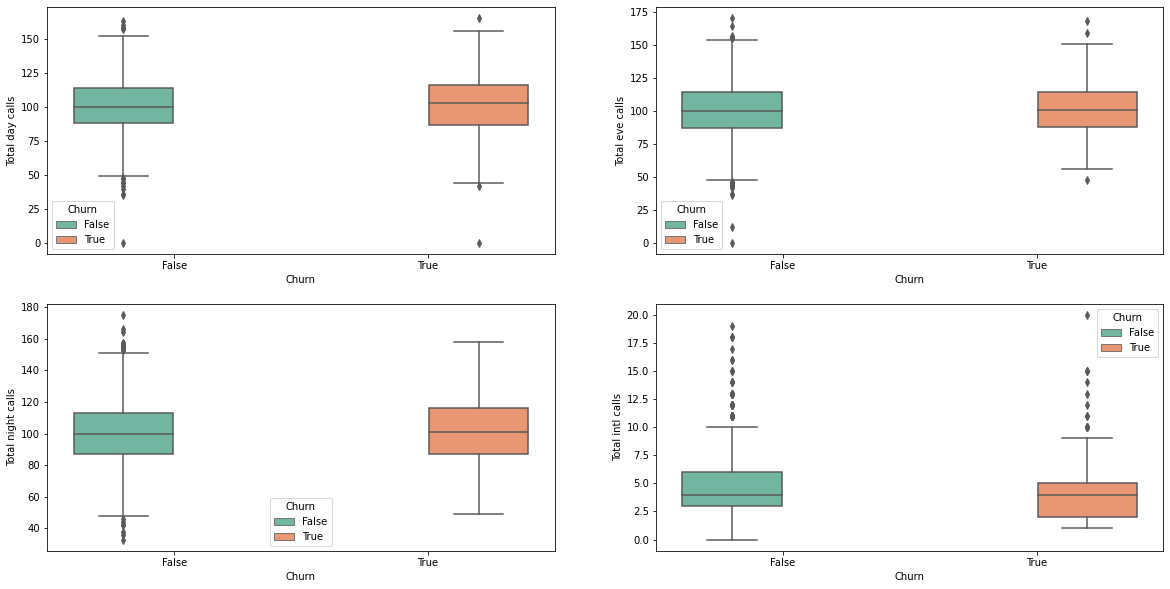

In [15]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 10))
palette = 'Set2'
sns.boxplot(y='Total day calls',x = 'Churn', hue = 'Churn',data = df_treino, ax=axarr[0][0], palette=palette)
sns.boxplot(y='Total eve calls',x = 'Churn', hue = 'Churn',data = df_treino , ax=axarr[0][1], palette=palette)
sns.boxplot(y='Total night calls',x = 'Churn', hue = 'Churn',data = df_treino, ax=axarr[1][0], palette=palette)
sns.boxplot(y='Total intl calls',x = 'Churn', hue = 'Churn',data = df_treino, ax=axarr[1][1], palette=palette)

* Em relação à quantidade de ligações realizadas por turno, não notamos uma grande diferença entre os churns e os clientes ativos. No entanto, se formos comparar a quantidade de ligações com os minutos despendidos, podemos reforçar a gravidade da perda de clientes, uma vez que o grupo dos churns possui uma média maior no quesito minutos realizados/chamada. 

* Já nas ligações internacionais, os churns possuem uma média levemente superior e todo o grupo já utilizou esse serviço, embora o intervalo interquartílico dos clientes ativos seja maior (o que diminui a sua média é o fato de ter uma parcela do seu grupo que não usufruiu do serviço em questão). 

<AxesSubplot:xlabel='Churn', ylabel='Total intl charge'>

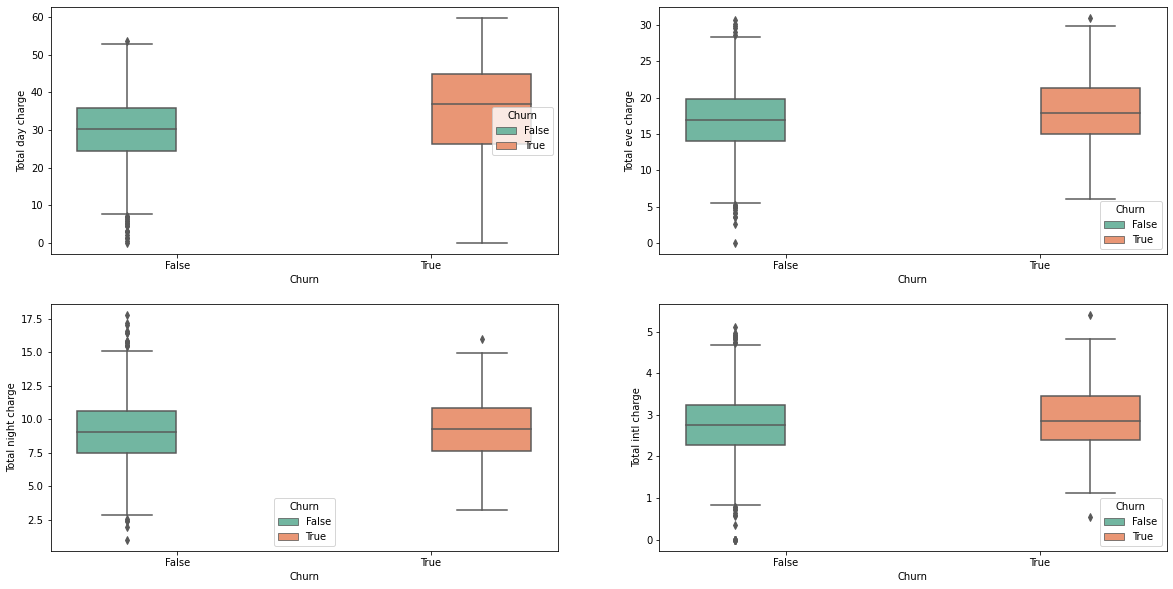

In [16]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 10))
palette = 'Set2'
sns.boxplot(y='Total day charge',x = 'Churn', hue = 'Churn',data = df_treino, ax=axarr[0][0], palette=palette)
sns.boxplot(y='Total eve charge',x = 'Churn', hue = 'Churn',data = df_treino , ax=axarr[0][1], palette=palette)
sns.boxplot(y='Total night charge',x = 'Churn', hue = 'Churn',data = df_treino, ax=axarr[1][0], palette=palette)
sns.boxplot(y='Total intl charge',x = 'Churn', hue = 'Churn',data = df_treino, ax=axarr[1][1], palette=palette)

Quando analisamos as cobranças, notamos que o grupo de *churns* possui um valor médio maior, em especial pelo período do dia. Isso ressalta a gravidade ocasionada pela perda de receita na organização, devido à diminuição do seu portfólio de clientes ativos citada anteriormente.

#### 3.2. Correlacionando as variáveis categóricas

<AxesSubplot:xlabel='Voice mail plan', ylabel='count'>

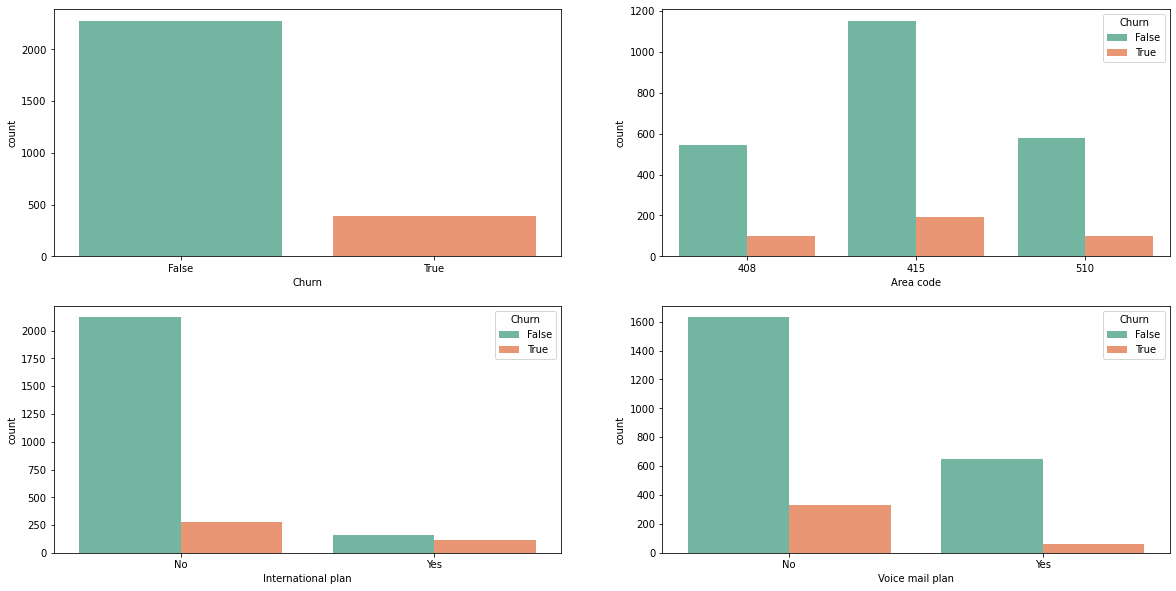

In [36]:
fig , axarr = plt.subplots(2, 2, figsize=(20, 10))
palette = 'Set2' 
sns.countplot(x= 'Churn', data = df_treino, ax=axarr[0][0], palette=palette)
sns.countplot(x='Area code', hue = 'Churn',data = df_treino, ax=axarr[0][1], palette=palette)
sns.countplot(x='International plan', hue = 'Churn',data = df_treino, ax=axarr[1][0], palette=palette)
sns.countplot(x='Voice mail plan', hue = 'Churn',data = df_treino, ax=axarr[1][1], palette=palette)

* Iniciando a análise das nossas variáveis categóricas, temos que 391 registros (dos 2666 que compões o conjunto de treino) são churns, o que representa quase 15% da nossa amostra de treino. o que sugere um dataset "desbalanceado";

* Quanto aos códigos de área, percebemos que aqueles que estão no código de área 415 são mais fiéis à empresa (essa área representa cerca de metade dos clientes atendidos). Em contrapartida, as regiões 408 e 510 possuem cerca de 1/4 da clientela cada uma e chegam a níveis de churn quase equivalentes ao da primeira região. Parece que a empresa está priorizando seus esforços para o lugar de onde vem a maior parte dos seus clientes, o que é bom, no entanto ela está perdendo fatia nas demais regiões, fato este que deve ser motivo de atenção. Deve-se Traçar uma estratégia de retenção para essas regiões de menor foco;

* Há um nível de fidelização muito maior pelas pessoas que não aderiram ao plano internacional em comparação aos clientes que aderiram, onde quase todos acabaram cancelando sua assinatura. Esse churn é alarmante e deve ser motivo de extrema atenção para a empresa: há algo errado na prestação de serviços referente ao plano internacional. Deve-se fazer um estudo atento para detectar as falhas desse serviço (seja no atendimento ou falhas operacionais), e assim mitigar a quantidade de churns referentes a esse motivo;

* Quanto aos churns devido ao plano de mensagens de voz, não conseguimos constatar nenhum motivo que relacione ambos, uma vez que a proporção dos dois é praticamente semelhante, o que nos passa uma primeira impressão de estabilidade na prestação desse tipo de serviço.

<AxesSubplot:xlabel='State', ylabel='count'>

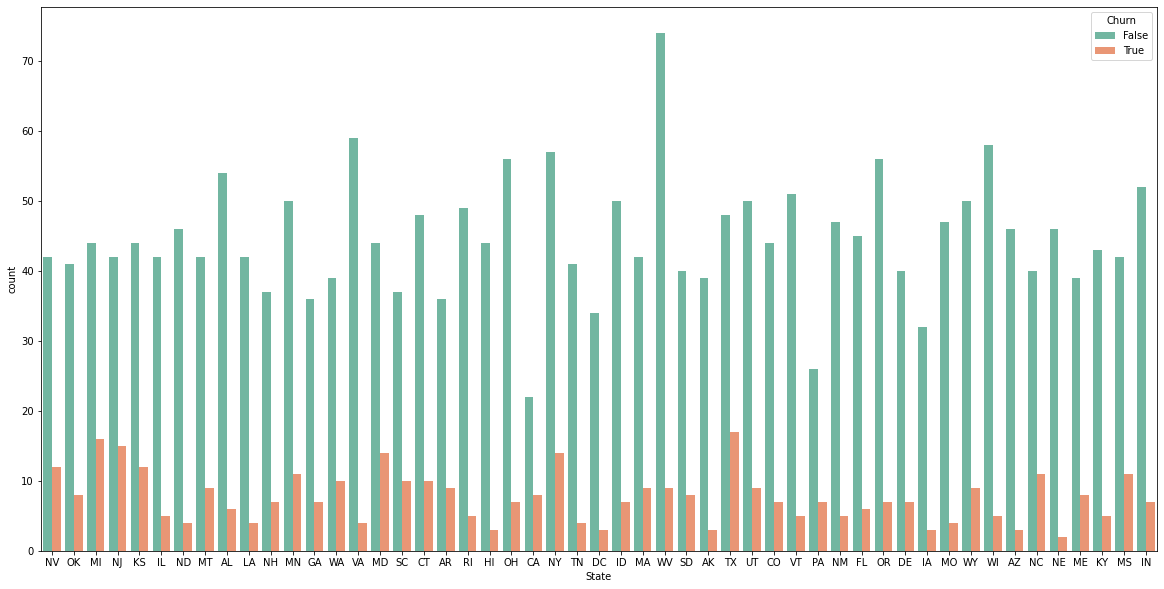

In [40]:
fig , axarr = plt.subplots(1, 1,figsize=(20, 10))
palette = 'Set2' 
sns.countplot(x='State', hue = 'Churn',data = df_treino, ax=axarr, palette=palette)